In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

# Processing UTMB1_std

In [3]:
df_glu_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/SecondBatch/OE240_UTMB_Mock_5ul_9min_IPM_LP_420to2k_21Dec2020.xlsx')
df_glu_6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/SecondBatch/OE240_UTMB_RSV_5ul_9min_IPM_LP_420to2k_21Dec2020.xlsx')
df_glu_1.info(), df_glu_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Monoisotopic Mass             147 non-null    float64
 1   Average Mass                  147 non-null    float64
 2   Sum Intensity                 147 non-null    float64
 3   Relative Abundance            147 non-null    float64
 4   Fractional Abundance          147 non-null    float64
 5   Number of Charge States       147 non-null    int64  
 6   Charge State Distribution     147 non-null    object 
 7   Number of Detected Intervals  147 non-null    int64  
 8   Delta Mass                    147 non-null    float64
 9   Scan Range                    147 non-null    object 
 10  Start Time (min)              147 non-null    float64
 11  Stop Time (min)               147 non-null    float64
 12  Apex RT                       147 non-null    float64
dtypes: fl

(None, None)

In [56]:
df_glu_1.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/SecondBatch/OE240_UTMB_Mock_5ul_9min_IPM_LP_420to2k_21Dec2020_std.xlsx')
df_glu_6.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/SecondBatch/OE240_UTMB_RSV_5ul_9min_IPM_LP_420to2k_21Dec2020_std.xlsx')

In [4]:
df_glu_1 = thermo_df(df_glu_1)
df_glu_6 = thermo_df(df_glu_6)

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_nb2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

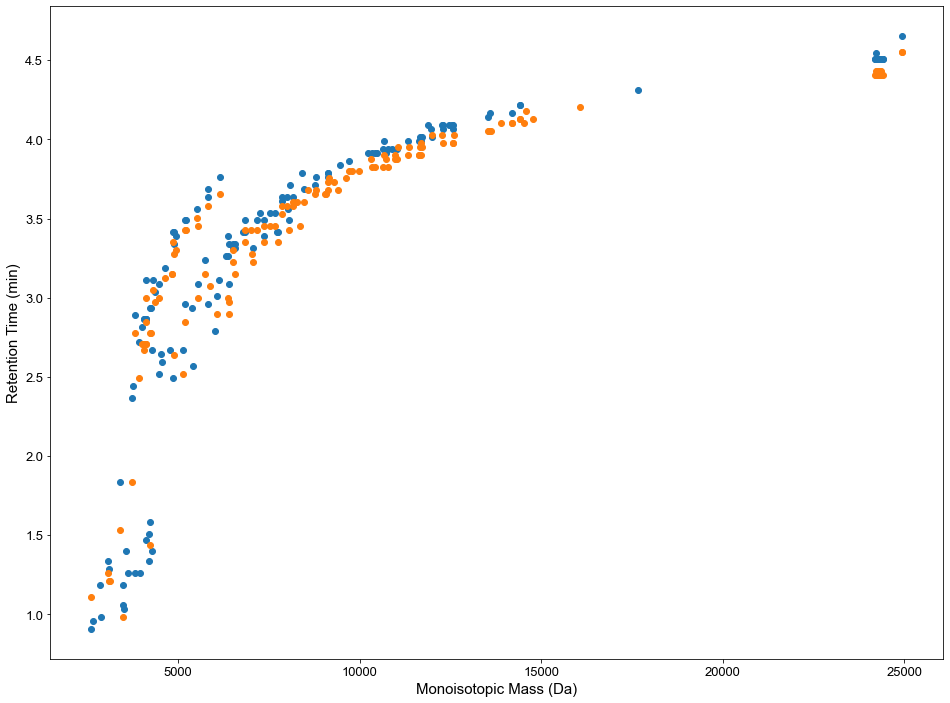

In [5]:
plot_zones(df_glu_1, df_glu_6)

In [73]:
def plot_basecalling3(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(20, 15))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
        
    plt.scatter(df.Mass, df.RT)

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair.RT, 'green')
        
        idmax = df_pair['Mass'].idxmax()
        plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(-10, 10), ha='center', color='black')
        
        if not annotate:
            continue
        mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

mass_x (80,) mass_y (80,)
df3_idxs 5 df5_idxs 5
df3_idxs 3 df5_idxs 3
df3_idxs 10 df5_idxs 10
df3_idxs 10 df5_idxs 10
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0


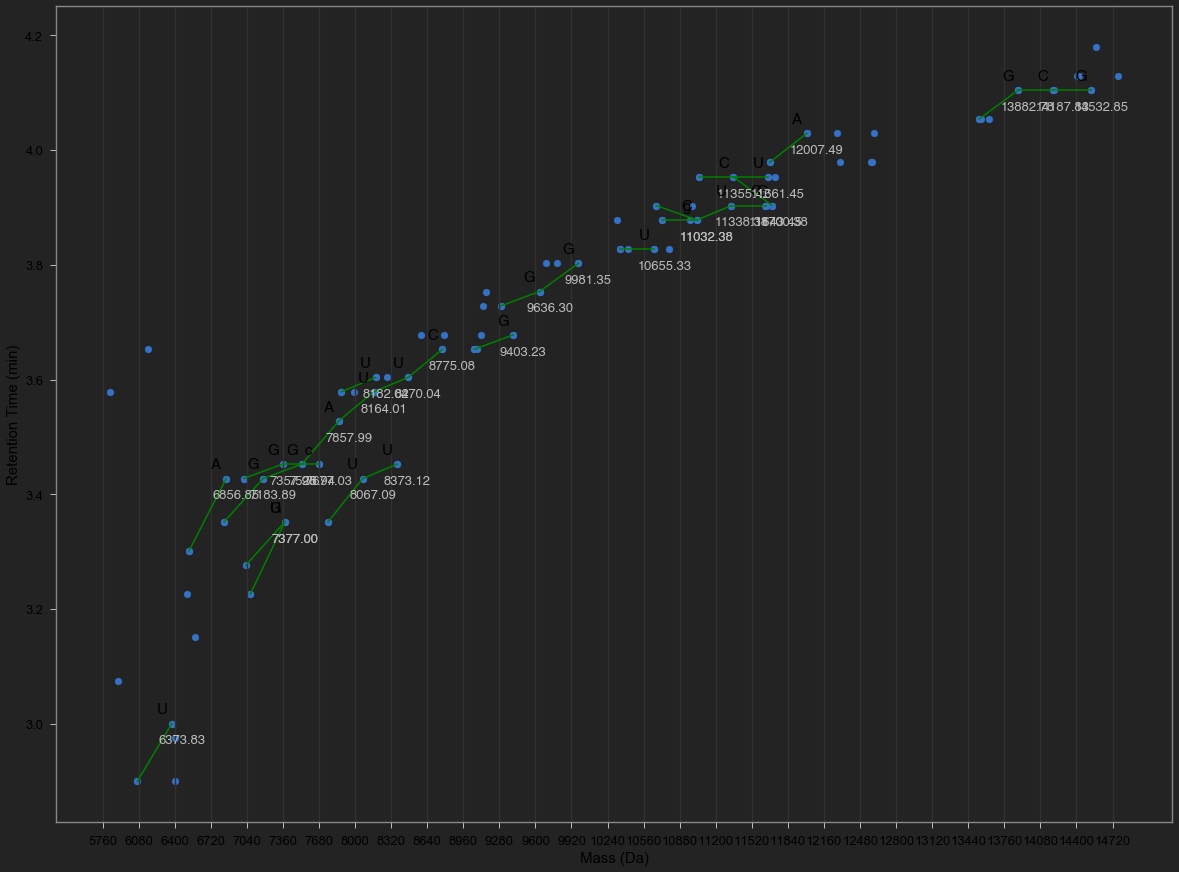

In [89]:
# df_paired_5p_top = df_paired_5p.sort_values('Vol', ascending=False).iloc[:27]
# df_tmp = df_glu_1[(df_glu_1.Mass > 5800) & (df_glu_1.Mass < 12000)]
df_tmp = df_glu_6[(df_glu_6.Mass > 5800) & (df_glu_6.Mass < 15000)]
bcr_5p = base_calling_random(df_tmp)
plt, fig = plot_basecalling3(*bcr_5p, annotate=True)
plt.scatter(df_tmp.Mass, df_tmp.RT, color='b')
# for idx, row in df_tmp.iterrows():
#     mass = '{:.2f}'.format(row.Mass)
#     plt.annotate(s=mass, size=13, xy=(row.Mass, row.RT), textcoords="offset points", xytext=(10, -20), ha='center')
        
# plt.xticks(np.arange(5760, 12000, 320))
plt.xticks(np.arange(5760, 15000, 320))
plt.grid(axis='x', which='major')
# plt.savefig('/Users/bryan/Downloads/Mock2.png', transparent=True)
plt.savefig('/Users/bryan/Downloads/RSV2.png', transparent=True)

In [11]:
df_glu_kernel = df_glu_1[(df_glu_1.Mass > 1000) & (df_glu_1.Mass < 20000)]

In [12]:
df_glu_kernel = df_glu_kernel.sort_values('Vol', ascending=False)

In [13]:
df_glu_kernel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 146
Data columns (total 3 columns):
Mass    131 non-null float64
RT      131 non-null float64
Vol     131 non-null float64
dtypes: float64(3)
memory usage: 4.1 KB


In [97]:
df_mock_25k.shape, df_rsv_25k.shape

((16, 3), (16, 3))

In [94]:
df_mock_25k = df_glu_1[df_glu_1.Mass > 20000]
df_rsv_25k = df_glu_6[df_glu_6.Mass > 20000]

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_mock_25k.Mass, y=df_mock_25k.RT, mode='markers', name='Mock'))
fig.add_trace(go.Scatter(x=df_rsv_25k.Mass, y=df_rsv_25k.RT, mode='markers', name='RSV'))
fig.show()

In [95]:
df_mock_10k.shape, df_rsv_10k.shape

((22, 3), (29, 3))

#### df_mock_25k.sort_values('Mass', ascending=False), df_rsv_25k.sort_values('Mass', ascending=False)

In [53]:
df_mock_10k = df_glu_1[(df_glu_1.Mass > 8000) & (df_glu_1.Mass < 11000)]
df_rsv_10k = df_glu_6[(df_glu_6.Mass > 8000) & (df_glu_6.Mass < 11000)]

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_mock_10k.Mass, y=df_mock_10k.RT, mode='markers', name='Mock'))
fig.add_trace(go.Scatter(x=df_rsv_10k.Mass, y=df_rsv_10k.RT, mode='markers', name='RSV'))
fig.show()

In [93]:
df_mock_10k.sort_values('Mass', ascending=False), df_rsv_10k.sort_values('Mass', ascending=False)

(             Mass        RT       Vol
 116  10895.338693  3.937709   5269.98
 101  10783.265755  3.937709   6910.55
 18   10727.342812  3.912543  72520.16
 82   10673.349711  3.988041  10393.47
 103  10656.346807  3.937709   6733.12
 115  10476.233073  3.912543   5280.77
 35   10420.318680  3.912543  41119.47
 104  10349.327915  3.912543   6646.52
 143  10243.415380  3.912543   2825.01
 84    9698.255907  3.862304   9766.75
 76    9465.181637  3.837138  11643.34
 60    9140.149264  3.786806  16572.29
 41    9121.139094  3.786806  34605.34
 50    9120.133541  3.761640  22270.84
 33    8793.103490  3.761640  44248.17
 36    8776.088455  3.711308  40282.95
 30    8470.043473  3.686143  55422.24
 128   8408.147481  3.786806   4390.64
 34    8164.021294  3.636500  43660.90
 130   8099.160323  3.711308   4244.48
 113   8067.097797  3.487755   5565.81
 146   8018.975991  3.562563   2337.46,
              Mass        RT       Vol
 112  10987.412205  3.903210   6575.57
 129  10971.397917  3.87

In [54]:
df_mock_15k = df_glu_1[(df_glu_1.Mass > 13000) & (df_glu_1.Mass < 16000)]
df_rsv_15k = df_glu_6[(df_glu_6.Mass > 13000) & (df_glu_6.Mass < 16000)]

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_mock_15k.Mass, y=df_mock_15k.RT, mode='markers', name='Mock'))
fig.add_trace(go.Scatter(x=df_rsv_15k.Mass, y=df_rsv_15k.RT, mode='markers', name='RSV'))
fig.show()

In [34]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

x = df_glu_top.Mass
y = df_glu_top.RT
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '4985d13…

In [16]:
df_glu_top_a = df_glu_top.iloc[idxs]

In [35]:
df_glu_top_b = df_glu_top#.iloc[idxs]

In [36]:
df_glu_top_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 146
Data columns (total 3 columns):
Mass    131 non-null float64
RT      131 non-null float64
Vol     131 non-null float64
dtypes: float64(3)
memory usage: 4.1 KB


In [37]:
df_glu_top_b = df_glu_top_b.sort_values('Vol', ascending=False)
df_glu_top_b_top = df_glu_top_b#[:800]
fig = px.scatter(x=df_glu_top_b_top.Mass, y=df_glu_top_b_top.RT)
fig.show()
# plot_zones(df_glu_top_a, df_glu_top_b)

mass_x (131,) mass_y (131,)
df3_idxs 5 df5_idxs 5
df3_idxs 10 df5_idxs 10
df3_idxs 9 df5_idxs 9
df3_idxs 5 df5_idxs 5
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0


(<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1440x1080 with 1 Axes>)

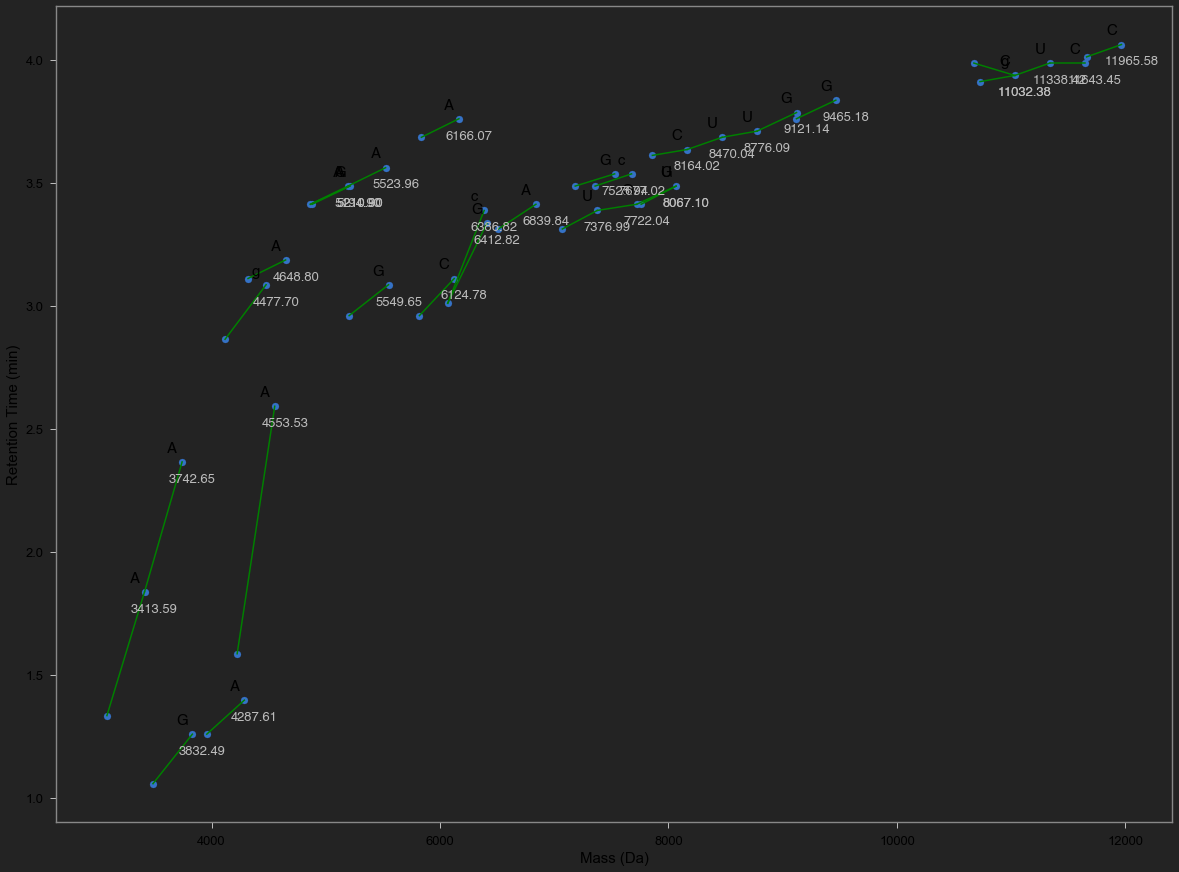

In [38]:
# df_paired_5p_top = df_paired_5p.sort_values('Vol', ascending=False).iloc[:27]
bcr_5p = base_calling_random(df_glu_top_b_top)
plot_basecalling(*bcr_5p, annotate=True)

# Grouped RT, Top Vol 

In [21]:
df1 = df_glu_top_b_top
df1_top = df1[(df1.Mass > 2000) & (df1.Mass < 22000)].sort_values('Vol').groupby('RT').tail(3)

In [24]:
import plotly.graph_objects as go

idxs = list()
# create our callback function
def update_point(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_draw = df2[(df2.Mass > 12329) & (df2.Mass < 22000) & (df2.RT < 25) & (df2.RT > 8)]
# df_draw = df2_chosen[:100] #df7
df_draw = df1_top#[(df7_top.RT < 25) & (df7_top.RT > 8)]
x = df_draw.Mass
y = df_draw.RT
fig = go.Scatter(x=x, y=y, mode='markers')
f = go.FigureWidget(fig)
f.update_layout(autosize=False, width=1024, height=700, paper_bgcolor="LightSteelBlue",
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20,
        pad=4
    ))
scatter = f.data[0]
scatter.on_selection(update_point)
f

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '8ad3da9…

points [0, 2, 3, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 38, 39, 40, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 60, 61, 62, 63, 64, 66, 68, 69, 70, 75, 76, 77, 78, 80, 81, 83, 84, 86, 87, 88, 89, 90, 94, 95, 96, 97]


In [25]:
df1_chosen = df_draw#.iloc[idxs]
df1_chosen.info()
df1_chosen = df1_chosen.sort_values('Vol', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 146 to 0
Data columns (total 3 columns):
Mass    113 non-null float64
RT      113 non-null float64
Vol     113 non-null float64
dtypes: float64(3)
memory usage: 3.5 KB


mass_x (131,) mass_y (131,)
df3_idxs 5 df5_idxs 5
df3_idxs 10 df5_idxs 10
df3_idxs 9 df5_idxs 9
df3_idxs 5 df5_idxs 5
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0


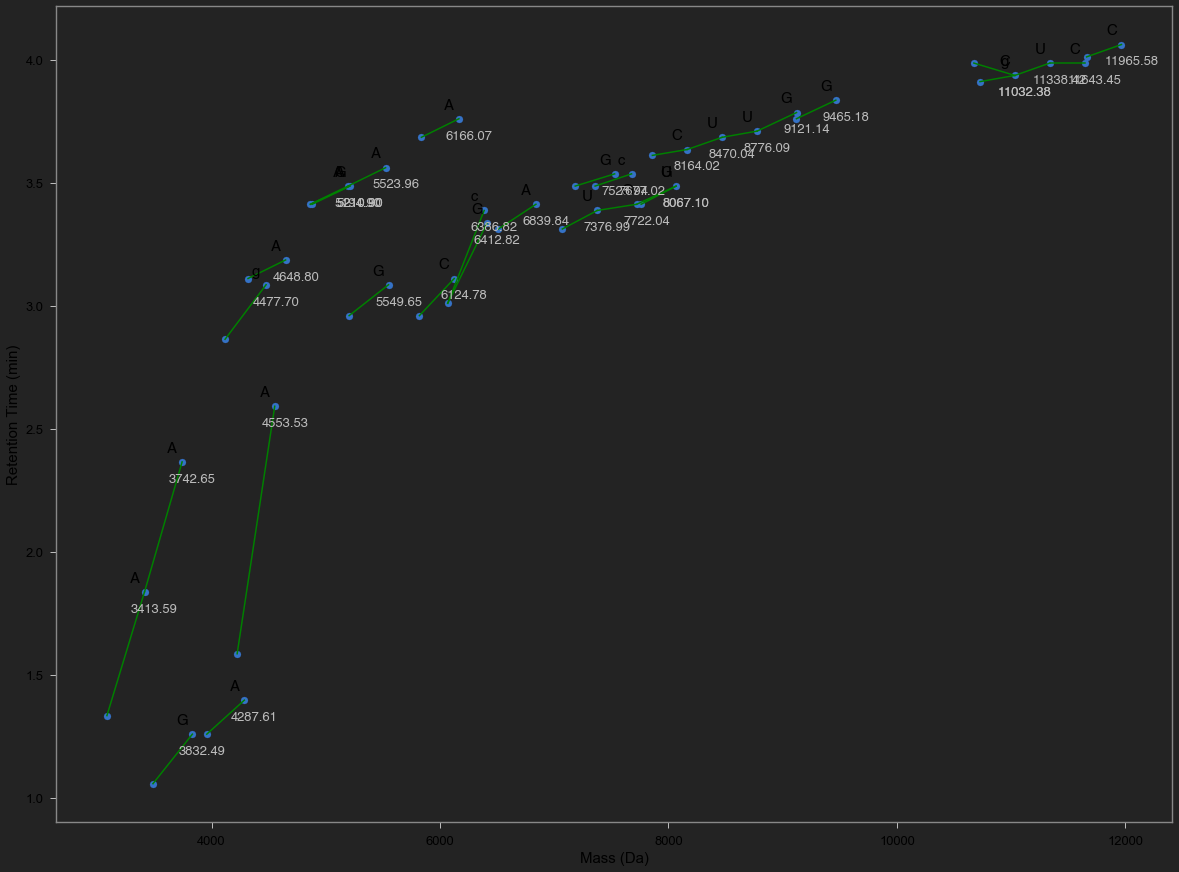

In [26]:
# plot_zone(df2_chosen[:100])
bcr_5p = base_calling_random(df_glu_top)
plt = plot_basecalling(*bcr_5p, annotate=True)
# plt.savefig('/Users/bryan/Downloads/Glu_1.png', bbox_inches='tight', transparent=True)

# Analysis dots that exist in Glu6 but not in Glu1

In [28]:
# match results
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/SecondBatch/OE240_UTMB_RSV_5ul_9min_IPM_LP_420to2k_21Dec2020.xlsx')
df = thermo_df(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 3 columns):
Mass    135 non-null float64
RT      135 non-null float64
Vol     135 non-null float64
dtypes: float64(3)
memory usage: 4.2 KB


In [66]:
df.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB6_match_utmb1.xls')

In [30]:
df_10k = df[(df.Mass > 8000) & (df.Mass < 12000)][['Mass', 'RT', 'Vol']]
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 22 to 134
Data columns (total 3 columns):
Mass    39 non-null float64
RT      39 non-null float64
Vol     39 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


In [31]:
df_10k = df_10k.sort_values('Mass', ascending=False)

In [32]:
df_10k[:15], df_10k[15:]

(             Mass        RT       Vol
 111  11729.418962  3.953542   6696.17
 107  11700.375182  3.903210   7433.58
 68   11678.449187  3.978707  17359.79
 58   11661.454879  3.953542  23643.96
 35   11643.454052  3.903210  47180.16
 127  11633.683838  3.903210   4005.93
 83   11355.424452  3.953542  12638.07
 77   11338.379277  3.903210  13800.73
 86   11050.365319  3.953542  12435.93
 97   11032.379828  3.878044   9599.46
 112  10987.412205  3.903210   6575.57
 129  10971.397917  3.878044   3615.61
 124  10783.238753  3.827712   4667.43
 47   10727.337596  3.878044  31256.12
 57   10673.352758  3.903210  24009.33,
              Mass        RT       Vol
 105  10655.334124  3.827712   7693.71
 61   10420.312329  3.827712  20821.57
 72   10349.322218  3.827712  15489.25
 134  10319.392997  3.878044   1507.76
 71    9981.346892  3.802546  16687.75
 117   9790.232811  3.802546   6302.26
 63    9698.220674  3.802546  19707.92
 66    9636.296041  3.753439  19072.64
 44    9403.225822  3.67

# if df1 - h2o exist in df6

In [70]:
df1_h2o = df_glu_1.copy()
df1_h2o.Mass = df1_h2o.Mass - 18.0106
df1_h2o.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB1_std_h2o.xlsx')

In [71]:
df1_h2o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
Unnamed: 0    655 non-null int64
Mass          655 non-null float64
RT            655 non-null float64
Vol           655 non-null float64
dtypes: float64(3), int64(1)
memory usage: 20.5 KB


In [72]:
df1_h2o_existin_6 = pd.read_csv('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB1_std_h2o.csv')
df1_h2o_existin_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 10 columns):
Unnamed: 0        655 non-null int64
Unnamed: 0.1      655 non-null int64
Unnamed: 0.1.1    655 non-null int64
Mass              655 non-null float64
RT                655 non-null float64
Vol               655 non-null float64
Match             655 non-null bool
Result            37 non-null object
TopVol            37 non-null float64
Idx               37 non-null object
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 46.8+ KB


In [75]:
df1_h2o_existin_6[df1_h2o_existin_6.Match == True].sort_values('Mass', ascending=False)[['Mass', 'RT', 'Vol']]

,Mass,RT,Vol
404,25006.438727,4.002958,13090.91
485,24372.228691,3.936846,6962.15
293,8775.080413,3.158227,42052.35
448,8470.048619,3.129338,8432.26
568,7183.896088,2.950127,3265.76
650,7012.933265,2.804435,731.21
440,6839.835485,2.892908,8918.69
325,4236.694721,2.411997,28111.13
616,4165.624078,1.273191,1768.80
275,4117.657211,2.565401,50795.71


# 25k dots exist in both df1 and df6

In [54]:
df_common_25k = df[(df.Mass > 22000) & (df.Match == True)]

In [55]:
df_common_25k.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB_common_25k.xlsx')

In [65]:
df_common_25k[['Mass', 'RT', 'Vol']]#.sort_values('Mass')

,Mass,RT,Vol
63,24302.228787,3.902960,1327968.92
72,24245.255352,3.879237,1088826.83
74,24359.176160,3.902960,1073765.30
83,24316.174848,3.902960,970725.06
88,24942.544205,3.997360,910792.30
89,24203.267831,3.879237,896322.88
91,24217.285294,3.879237,869971.01
92,24189.249699,3.879237,868042.84
104,24330.164124,3.879237,693826.58
111,24373.150749,3.902960,639863.42


# df1 also exist in df6

In [84]:
df1_in6 = pd.read_csv('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB6_std.csv')
df1_in6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 9 columns):
Unnamed: 0      818 non-null int64
Unnamed: 0.1    818 non-null int64
Mass            818 non-null float64
RT              818 non-null float64
Vol             818 non-null float64
Match           818 non-null bool
Result          382 non-null object
TopVol          382 non-null float64
Idx             382 non-null object
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 52.0+ KB


In [85]:
df1_in6[(df1_in6.Match==True) & (df1_in6.Mass > 22000)].sort_values('Mass', ascending=False)[['Mass', 'RT', 'Vol']]

,Mass,RT,Vol
221,24999.470838,4.015251,148493.68
448,24972.521194,3.997360,22590.57
88,24942.544205,3.997360,910792.30
166,24928.523345,3.997360,277735.66
155,24416.100012,3.902960,308863.05
341,24401.115425,3.879237,50496.61
293,24400.089830,3.861464,73458.86
204,24386.108533,3.902960,182941.19
111,24373.150749,3.902960,639863.42
360,24372.164732,3.997360,41427.43


# df6 only

In [37]:
df_only6 = df[df.Match == False]
df_only6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 14 to 814
Data columns (total 9 columns):
Unnamed: 0      436 non-null int64
Unnamed: 0.1    436 non-null int64
Mass            436 non-null float64
RT              436 non-null float64
Vol             436 non-null float64
Match           436 non-null bool
Result          0 non-null object
TopVol          0 non-null float64
Idx             0 non-null object
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 31.1+ KB


In [38]:
df_only6 = df_only6[['Mass', 'RT', 'Vol']]

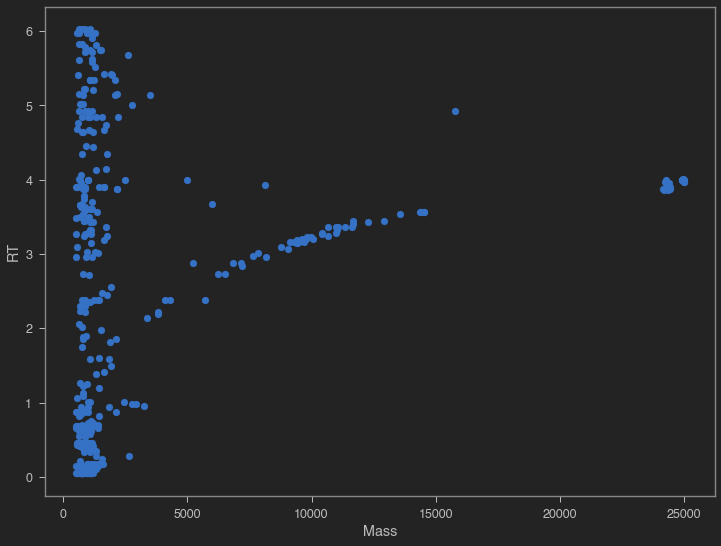

In [39]:
plot_zone(df_only6)

In [40]:
df_only6.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/Excels/UTMB_6only.xlsx')

In [27]:
df_glu_top = df_only6[(df_only6.RT < 4.1) & (df_only6.RT > 2) & (df_only6.Mass > 2000)]
df_glu_top.info()
fig = px.scatter(x=df_glu_top.Mass, y=df_glu_top.RT)
fig.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 70 to 810
Data columns (total 9 columns):
Unnamed: 0      81 non-null int64
Unnamed: 0.1    81 non-null int64
Mass            81 non-null float64
RT              81 non-null float64
Vol             81 non-null float64
Match           81 non-null bool
Result          0 non-null object
TopVol          0 non-null float64
Idx             0 non-null object
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 5.8+ KB


In [44]:
df_6only_groupedRT_topVol = df_glu_top[df_glu_top.Mass > 2000].sort_values('Vol').groupby('RT').tail(1)
df_6only_groupedRT_topVol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 809 to 70
Data columns (total 9 columns):
Unnamed: 0      36 non-null int64
Unnamed: 0.1    36 non-null int64
Mass            36 non-null float64
RT              36 non-null float64
Vol             36 non-null float64
Match           36 non-null bool
Result          0 non-null object
TopVol          0 non-null float64
Idx             0 non-null object
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 2.6+ KB


In [49]:
df_glu_top = df_glu_top.sort_values('Mass', ascending=True)
df_zone = df_glu_top[df_glu_top.Mass > 20000]
fig = px.scatter(x=df_zone.Mass, y=df_zone.RT)
fig.show()
df_6only_groupedRT_topVol[df_6only_groupedRT_topVol.Mass>20000]

,Unnamed: 0,Unnamed: 0.1,Mass,RT,Vol,Match,Result,TopVol,Idx
70,70,226,24259.192299,3.879237,1111322.15,False,NaN,NaN,NaN
129,129,559,24287.206621,3.902960,485118.88,False,NaN,NaN,NaN
211,211,905,24343.156944,3.861464,168017.94,False,NaN,NaN,NaN
318,318,1291,24415.120371,3.951101,61016.07,False,NaN,NaN,NaN
133,133,581,24957.533411,4.015251,461854.85,False,NaN,NaN,NaN
214,214,923,24984.533306,3.997360,164861.95,False,NaN,NaN,NaN
178,178,775,24998.479123,3.973584,235239.30,False,NaN,NaN,NaN


In [94]:
df_6only_groupedRT_topVol[df_6only_groupedRT_topVol.Mass>20000][['Mass', 'RT', 'Vol']]

,Mass,RT,Vol
70,24259.192299,3.879237,1111322.15
129,24287.206621,3.902960,485118.88
211,24343.156944,3.861464,168017.94
318,24415.120371,3.951101,61016.07
133,24957.533411,4.015251,461854.85
214,24984.533306,3.997360,164861.95
178,24998.479123,3.973584,235239.30


In [48]:
df_glu_top = df_glu_top.sort_values('Mass', ascending=True)
df_zone = df_glu_top[(df_glu_top.Mass > 320*27) & (df_glu_top.Mass < 320*40)]
fig = px.scatter(x=df_zone.Mass, y=df_zone.RT)
fig.show()

mass_x (28,) mass_y (28,)
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 5 df5_idxs 5
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0


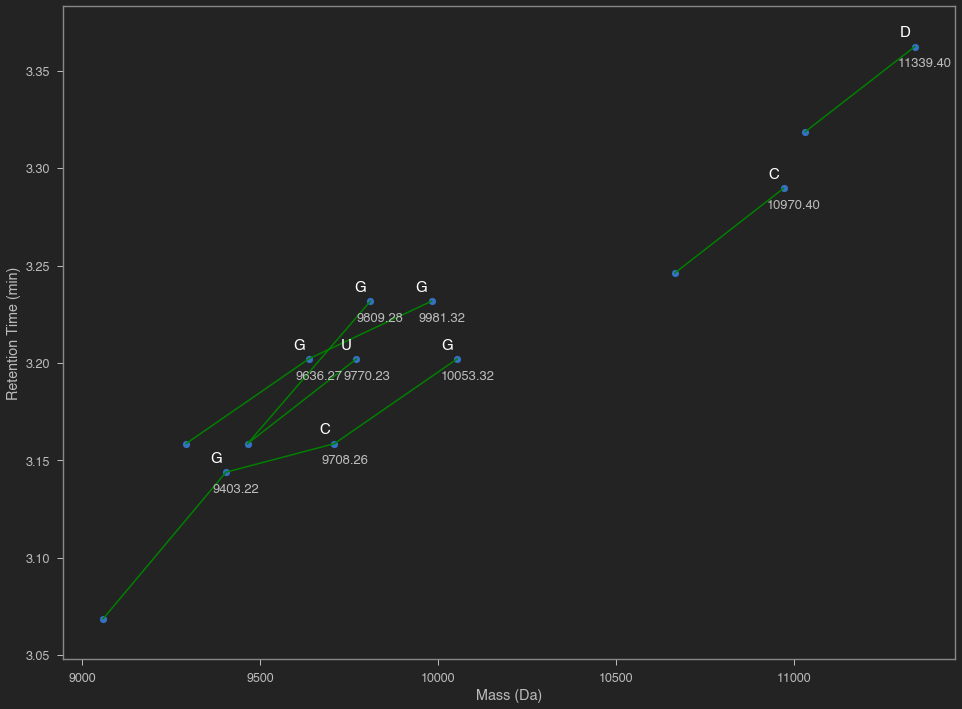

In [35]:
bcr_5p = base_calling_random(df_zone)
plt = plot_basecalling(*bcr_5p, annotate=True)
# plt.savefig('/Users/bryan/Downloads/Glu_1.png', bbox_inches='tight', transparent=True)

In [58]:
df_10k = df_glu_top[(df_glu_top.Mass > 320*27) & (df_glu_top.Mass < 320*40)]
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 460 to 780
Data columns (total 9 columns):
Unnamed: 0      28 non-null int64
Unnamed: 0.1    28 non-null int64
Mass            28 non-null float64
RT              28 non-null float64
Vol             28 non-null float64
Match           28 non-null bool
Result          0 non-null object
TopVol          0 non-null float64
Idx             0 non-null object
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 2.0+ KB


In [63]:
df_10k.sort_values('Mass', ascending=False)

,Unnamed: 0,Unnamed: 0.1,Mass,RT,Vol,Match,Result,TopVol,Idx
780,780,2829,12277.530882,3.435972,2056.43,False,NaN,NaN,NaN
732,732,2675,11677.437513,3.450588,3435.23,False,NaN,NaN,NaN
509,509,1949,11661.442699,3.406481,15740.52,False,NaN,NaN,NaN
493,493,1895,11643.443796,3.362447,17569.38,False,NaN,NaN,NaN
717,717,2623,11339.402704,3.362447,3802.31,False,NaN,NaN,NaN
719,719,2631,11049.369897,3.362447,3791.56,False,NaN,NaN,NaN
746,746,2720,11031.364135,3.318737,3149.41,False,NaN,NaN,NaN
684,684,2521,10987.408620,3.362447,5107.13,False,NaN,NaN,NaN
612,612,2284,10970.404243,3.289655,7822.16,False,NaN,NaN,NaN
388,388,1540,10665.374567,3.246257,33150.21,False,NaN,NaN,NaN
